# Hybridizable Discontinuous Galerkin Methods

In [38]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## 1.1 El caso unidimensional

Considere el intervalo $I = (a,b)$ y el sistema
\begin{equation}
\begin{array}{rclrl}
\displaystyle c q + \frac{d}{dx}u & = & 0, &\text{en}& I \\
\displaystyle \frac{d}{dx} q &=& f, &\text{en}& I \\
u&=&u_{D}, &\text{sobre}& \{a,b\}
\end{array}
\end{equation}

Caracterizacion del problema

\begin{equation}
(q, u) = (Q, U) \quad \Longleftrightarrow \quad
\widehat{u}(x_i) \text{ solucion de:}
\left\{
\begin{array}{rclrl}
Q(x_i^+) &=& Q(x_i^-) & \text{for} & i=1,...,N-1\\
\widehat{u}(x_i)&=& u_{D}(x_i) &\text{for} & i=0,N
\end{array}
\right.
\end{equation}

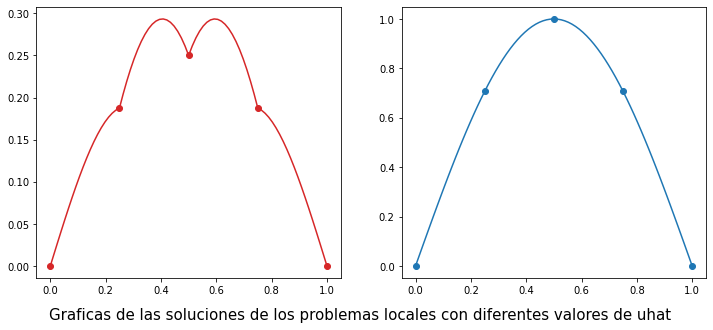

In [37]:
# Chracterization
u = lambda x: np.sin(np.pi*x)
f = lambda x: np.pi**2*np.sin(np.pi*x)

def solution_bvp(x, I, u0val):
    a = I[0]; b = I[1]
    ua = u0val[0]; ub = u0val[1]
    C1 = ((np.sin(np.pi*b)-np.sin(np.pi*a)) - (ub-ua))/(b-a)
    C2 = ((a*np.sin(np.pi*b)-b*np.sin(np.pi*a)) - (a*ub-b*ua))/(b-a)
    return np.sin(np.pi*x)-C1*x+C2

# mesh
x = np.linspace(0, 1, 5)
uval_1 = x*(1-x)
uval_2 = u(x)

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(x, uval_1,'o', color = 'C3')
ax[1].plot(x, uval_2,'o', color = 'C0')

for j in range(x.size-1):
    a = x[j]
    b = x[j+1]
    xlocal = np.linspace(a, b, 20)
    ua = uval_1[j]
    ub = uval_1[j+1]
    ax[0].plot(xlocal, solution_bvp(xlocal, [a,b], [ua,ub]), color='C3')
    ua = uval_2[j]
    ub = uval_2[j+1]
    ax[1].plot(xlocal, solution_bvp(xlocal, [a,b], [ua,ub]), color='C0')
# end for
txt="Graficas de las soluciones de los problemas locales con diferentes valores de uhat"
fig.text(0.5, .01, txt, ha='center', fontsize = 15)

plt.show()

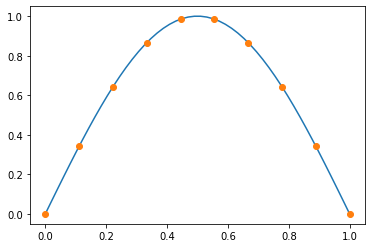

In [74]:
# Green function on the interval

def Gi(x,s, c, Ii):

    int1 = integrate.quad(c, Ii[0], Ii[1])[0]
    
    if s>=Ii[0] and s<x and x<Ii[1]:
        return (1.0/int1)*integrate.quad(c, Ii[0], s)[0]*integrate.quad(lambda x: c(x), x, Ii[1])[0]

    elif s>=x and s<=Ii[1] and x>Ii[0]:
        return (1.0/int1)*integrate.quad(c, s, Ii[1])[0]*integrate.quad(lambda x: c(x), Ii[0], x)[0]
    else:
        return 0
    
def ui(x, Ii, c, f):
    vGi = np.vectorize(lambda s: Gi(x,s,c,Ii))
    return integrate.quad(lambda s: vGi(s)*f(s), Ii[0], Ii[1])[0]


u = lambda x: np.sin(np.pi*x)
a = lambda x: (x+1)**2
c = lambda x: 1.0/a(x)
f = lambda x: np.pi**2*np.sin(np.pi*x)*(x+1)**2-2*(x+1)*np.pi*np.cos(np.pi*x)
uval = np.zeros(xplot.size)
for j,x in enumerate(xplot):
    uval[j] = ui(x, [0,1] ,c,f)
#print(ui(xplot, [0,1],c, f))
plt.plot(xplot, uval)
xx = np.linspace(0,1,10)
plt.plot(xx, u(xx),'o')
